# Lesson 5 - Starter Code

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import statsmodels.formula.api as smf

# read in the mammal dataset
wd = '../../assets/dataset/msleep/'
mammals = pd.read_csv(wd+'msleep.csv')
print mammals.shape
mammals = mammals[mammals.brainwt.notnull()]
print mammals.shape

(83, 11)
(56, 11)


# Part 1:
Explore our mammals dataset

In [5]:
mammals.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0,NaN,NaN,21.0,0.09820,14.800


### Check 1. Distribution

#### Lets check out a scatter plot of body wieght and brain weight

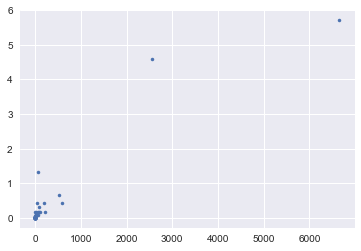

In [6]:
# create a matplotlib figure
plt.figure()
# generate a scatterplot inside the figure
plt.plot(mammals.bodywt, mammals.brainwt, '.')
# show the plot
plt.show()

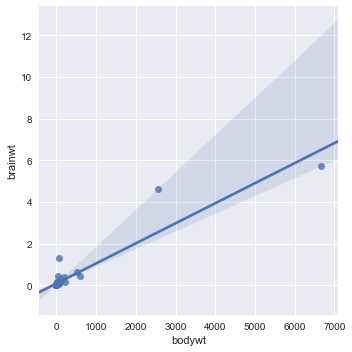

In [7]:
sns.lmplot('bodywt', 'brainwt', mammals)

### Log transformation can help here. 
Curious about the math? http://onlinestatbook.com/2/transformations/log.html



In [12]:
log_columns = ['bodywt', 'brainwt',]
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)


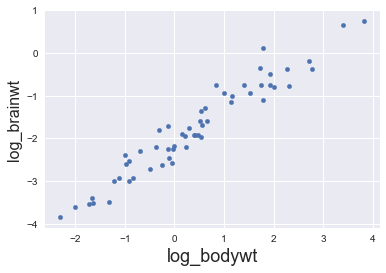

In [15]:
log_mammals.plot(x='bodywt',y='brainwt',kind='scatter')
plt.xlabel('log_bodywt', fontsize=18)
plt.ylabel('log_brainwt', fontsize=16)

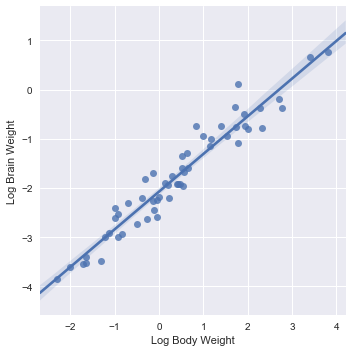

In [10]:
g = sns.lmplot('bodywt', 'brainwt', log_mammals)
g.set_axis_labels( "Log Body Weight", "Log Brain Weight")

#### Woohoo! This looks much better. 

### Part 1-  Student: 
Update and complete the code below to use lmplot and display correlations between body weight and two different dependent variables: sleep_rem and awake.


##### Complete below for 2 new models: 

1. y as bodywt and x as sleep_rem. Try log of sleep_rem as well
2. y as bodywt and x as awake.  Try log of awake as well

In [20]:
#1. add any additional variables that you would like to take the log of


#### Create the lmplots

#### Play around with other dependent and independent variables such as awake as a function of brain weight

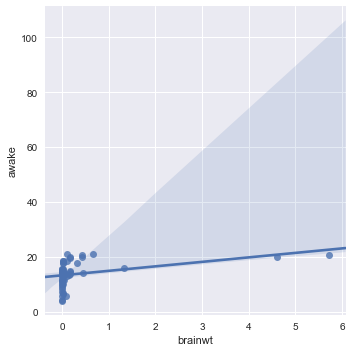

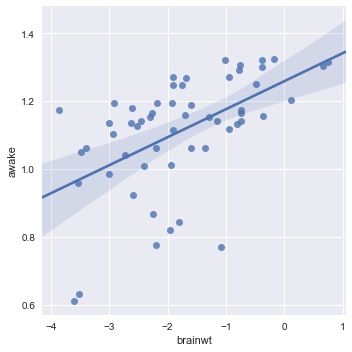

In [21]:
log_columns = ['bodywt', 'brainwt', 'awake', 'sleep_rem']  # any others?
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)

# one other example, using brainwt and awake.
x = 'brainwt'
y = 'awake'
sns.lmplot(x, y, mammals)
sns.lmplot(x, y, log_mammals)

### Lets compare a model with and without the log transformation

In [25]:
# not transformed

X = mammals[['bodywt']]
y = mammals['brainwt']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='brainwt ~ bodywt', data=mammals).fit()
#print the full summary
lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                brainwt   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     367.7
Date:                Tue, 10 Oct 2017   Prob (F-statistic):           9.16e-26
Time:                        08:57:39   Log-Likelihood:                -20.070
No. Observations:                  56   AIC:                             44.14
Df Residuals:                      54   BIC:                             48.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0859      0.048      1.782      0.080      -0.011       0.183
bodywt         0.0010   5.03e-05     19.176      0.000       0.001       0.001
==============================================================================
Omnibus:                       85.068   Durbin-Watson:                   2.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1330.630
Skew:                           4.258   Prob(JB):                    1.14e-289
Kurtosis:                      25.311   Cond. No.                         981.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our output tells us that:

* The relationship between bodywt and brainwt isn't random (p value approaching 0)  
* With this current model, brainwt is roughly bodywt * 0.0010
* The model explains, roughly, 87% of the variance of the dataset 

### Student: repeat with the log transformation

In [23]:
# Log transformed
X =
y = 

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'

#print the full summary

SyntaxError: invalid syntax (<ipython-input-23-7763966e1ab3>, line 2)

### What does our output tell us?

Our output tells us that:


#### Bonus: Use Statsmodels to make the prediction

In [27]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'bodywt': [50]})
X_new.head()


,bodywt
0,50


### Predict X_new using the model trained with the log transformed data. Remember to maintain the transformations upon predicting. You can use lm.predict for prediction

In [40]:
#do a predict here. Remember what you transformed...

# Part 2: Multiple Regression Analysis using citi bike data 

In the previous example, one variable explained the variance of another; however, more often than not, we will need multiple variables. 

For example, a house's price may be best measured by square feet, but a lot of other variables play a vital role: bedrooms, bathrooms, location, appliances, etc. 

For a linear regression, we want these variables to be largely independent of each other, but all of them should help explain the y variable.

We'll work with bikeshare data to showcase what this means and to explain a concept called multicollinearity.

In [41]:
wd = '../../assets/dataset/bikeshare/'
bike_data = pd.read_csv(wd+'bikeshare.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Check 2. Multicollinearity
What is Multicollinearity?

With the bike share data, let's compare three data points: actual temperature, "feel" temperature, and guest ridership. 

Our data is already normalized between 0 and 1, so we'll start off with the correlations and modeling.

## Students: 
using the code example below create a correlation heat map comparing 'temp', 'atemp', 'casual'


```python
# cmap is essentially a set of color mappings that distinguish extremes
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 
correlations = data[[insert_columns_here]].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap) ```

In [43]:
#cmap...


#### Question: What did we find? 

#### The correlation matrix explains that:


### Demo: We can measure this effect in the coefficients:



Side note: this is a sneak peak at scikit learn

In [44]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values
    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    plt.figure()
    plt.hist(residuals, bins=np.ceil(np.sqrt(len(y))))
    # keep the model
    return algo




temp
P Values: [ 0.]
Coefficients: [ 117.68705779]
y-intercept: -22.812739188
R-Squared: 0.21124654163

atemp
P Values: [ 0.]
Coefficients: [ 130.27875081]
y-intercept: -26.3071675481
R-Squared: 0.206188705733

temp, atemp
P Values: [ 0.  0.]
Coefficients: [ 116.34021588    1.52795677]
y-intercept: -22.8703398286
R-Squared: 0.21124723661



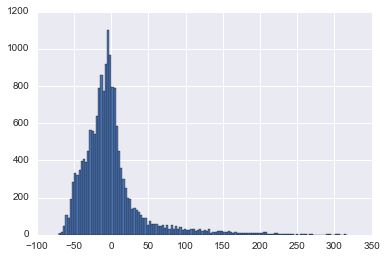

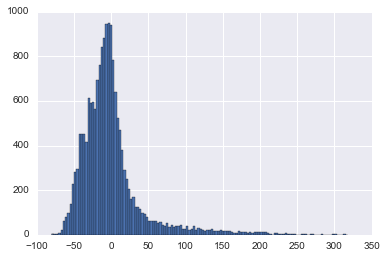

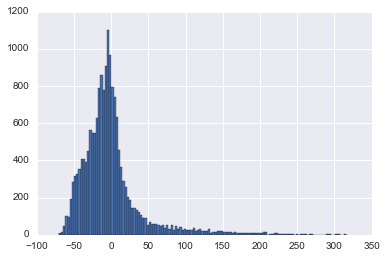

In [48]:
y = bike_data['casual']
# Try 3 different models with various combinations of independent variables.
x_sets = (
    ['temp'],
    ['atemp'],
    ['temp', 'atemp'],
)

for x in x_sets:
    print ', '.join(x)
    get_linear_model_metrics(bike_data[x], y, linear_model.LinearRegression())
    print

###  Intrepretation: 


### What happens if we use a second variable that isn't highly correlated with temperature, like humidity?



P Values: [ 0.  0.]
Coefficients: [ 112.02457031  -80.87301833]
y-intercept: 30.7273338581
R-Squared: 0.310901196913


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

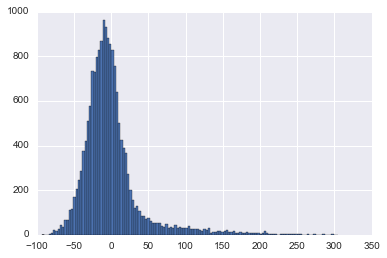

In [49]:
y = bike_data['casual']
x = bike_data[['temp', 'hum']]
get_linear_model_metrics(x, y, linear_model.LinearRegression())


## Guided Practice: Multicollinearity with dummy variables (15 mins)



There can be a similar effect from a feature set that is a singular matrix, which is when there is a clear relationship in the matrix (for example, the sum of all rows = 1).

### Run through the following code on your own.
#### What happens to the coefficients when you include all weather situations instead of just including all except one?

In [50]:
bike_data.weathersit.value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

In [28]:
lm = linear_model.LinearRegression()
weather = pd.get_dummies(bike_data.weathersit)

get_linear_model_metrics(weather[[1, 2, 3, 4]], y, lm)
print
# Set one weather as the reference (drop it), weather situation  = 4
get_linear_model_metrics(weather[[1, 2, 3]], y, lm)

NameError: name 'linear_model' is not defined

### Interpretation: 
This model makes more sense, because we can more easily explain the variables compared to the one we left out. 

For example, this suggests that a clear day (weathersit:1) on average brings in about 38 more riders hourly than a day with heavy snow. 

In fact, since the weather situations "degrade" in quality (1 is the nicest day, 4 is the worst), the coefficients now reflect that well. 

However at this point, there is still a lot of work to do, because weather on its own fails to explain ridership well.




### Checkout our data again

In [52]:
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [53]:
bike_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Part 3- Building a model to predict guest ridership
With a partner, complete this code together and visualize the correlations of all the numerical features built into the data set.

We want to:
- Id categorical variables
- Create dummies (weather situation is done for you in the starter code)
- Find at least two more features that are not correlated with current features, but could be strong indicators for predicting guest riders.

Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'hr', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt', u'weather_1',
       u'weather_2', u'weather_3', u'weather_4'],
      dtype='object')
               temp  weather_1  weather_2  weather_3
temp       1.000000   0.101044  -0.069657  -0.062406
weather_1  0.101044   1.000000  -0.822961  -0.412414
weather_2 -0.069657  -0.822961   1.000000  -0.177417
weather_3 -0.062406  -0.412414  -0.177417   1.000000
Axes(0.125,0.125;0.62x0.775)


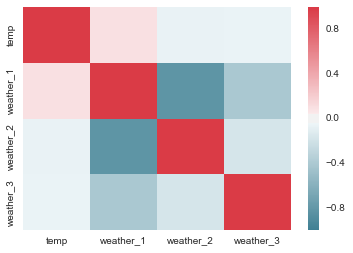

In [54]:
#starter code (hints!)

#Dummies example: 
weather = pd.get_dummies(bike_data.weathersit)
#create new names for our new dummy variables
weather.columns = ['weather_' + str(i) for i in weather.columns]
#join those new variables back into the larger dataset
bikemodel_data = bike_data.join(weather)
print bikemodel_data.columns

#Select columns to keep. Don't forget to set a reference category for your dummies (aka drop one)
columns_to_keep = ['temp', 'weather_1', 'weather_2', 'weather_3'] #[which_variables?]

#checking for colinearity
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = bikemodel_data[columns_to_keep].corr()# what are we getting the correlations of?
print correlations
print sns.heatmap(correlations, cmap=cmap)





## Independent Practice (After Class): Building model to predict guest ridership 


#### Pay attention to:
* Which variables would make sense to dummy (because they are categorical, not continuous)? 
* the distribution of riders (should we rescale the data?)  
* checking correlations with variables and guest riders  
* having a feature space (our matrix) with low multicollinearity  
* the linear assumption -- given all feature values being 0, should we have no ridership? negative ridership? positive ridership?
* What features might explain ridership but aren't included in the data set? 


###  You're done when:  
If your model has an r-squared above .4, this a relatively effective model for the data available. Kudos! Move on to the bonus!

In [56]:
#your code here...

In [ ]:
#add as many cells as you need :) 

####1: What's the strongest predictor? 

Answer:

####2: How well did your model do? 

Answer:

####3: How can you improve it? 

Answer:

###Bonus:
    
We've completed a model that explains casual guest riders. Now it's your turn to build another model, using a different y (outcome) variable: registered riders.

Bonus 1: What's the strongest predictor? 

Bonus 2: How well did your model do? 

Bonus 3: How can you improve it? 